# The Sparks Foundation internship
# Data Science and Business Analytics
# Name-Srideep Bhattacharya
# Predict the score of a student based on the number of study hours using supervised ML

# Importing packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#reading the dataset
df=pd.read_excel("students_detail.xlsx");
df.shape #dimension check of our dataset.

(25, 2)

# Eyeballing our dataset to observe features.

In [2]:
df.head() #displaying first five rows of our dataframe.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe() #checking for mean,median,standard deviation and missing values if any

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info() #gives information about the type of our data and checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data analysis to understand relationship between attributes and finding outliers if any.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

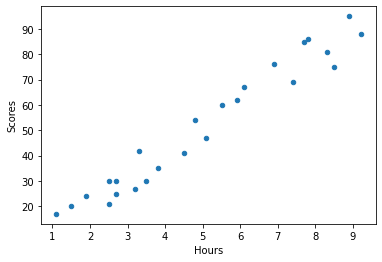

In [5]:
df.plot.scatter('Hours','Scores') 
# A scatter plot is plotted for bivariate analysis.(Preferred when one is categorical and other is continuous)

In [6]:
df.corr() #Checking how the two attributes are corelated to each other.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting the data into train and test data.(80% train,20% test)

In [7]:
train=df[0:19]
test=df[20:]

In [8]:
from sklearn.linear_model import LinearRegression #importing sci-kit learn package to build regression model 
lreg=LinearRegression() #creating an object of linear regression class

# Building linear regression model.

In [9]:
x_train=train.drop('Scores',axis=1)  
y_train=train['Scores']     #target attribute separated from train dataset.
x_test=test.drop('Scores',axis=1)  
true_p=test['Scores']     #target attribute separated from test dataset.

In [10]:
df.isnull().sum() #checking if any missing values are there,so that we can deal with them before fitting our model.

Hours     0
Scores    0
dtype: int64

In [11]:
lreg.fit(x_train,y_train)  #fitting our train dataset.Our model is now ready for making predictions

LinearRegression()

In [12]:
pred=lreg.predict(x_test)  #Storing the predictions made by our model on test dataset.
pred

array([28.78125077, 48.9617457 , 39.35198621, 69.14224064, 77.79102418])

In [13]:
lreg.score(x_test,true_p) #calculating R^2 value to check how well our model performed on test dataset.

0.9338130834946532

In [14]:
lreg.score(x_train,y_train)#calculating R^2 value to check how well our model performed on train dataset.

0.9559214823317137

In [15]:
test.head() #Comparing the model predictions and test dataset,we can conclude our model has performed fairly well.

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# What will be predicted score if a student studies for 9.25 hrs/day?

In [16]:
arr=np.array([9.25])  
x_new=arr.reshape(1,1) #predict function accepts 2-D array as argument so we perform this step to convert 1-D to 2-D array.
y_new=lreg.predict(x_new)

In [17]:
y_new

array([91.72517545])

In [18]:
df[df['Hours']>=9]

,Hours,Scores
6,9.2,88


# So,the student is predicted to score 91.725 if he/she studies for 9.25 hrs/day.
# We cross-check by comparing it with study hours greater than or equal to 9.It clearly seems a correct prediction as we had a positive correlation between hours and score.